<center><h1> Time Series </h1></center>
<center> Key Concepts Illustrated </center>

# Import

In [1]:
### General import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import statsmodels.api as sm

### Time Series
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
from pandas.tools.plotting import autocorrelation_plot
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
#from statsmodels.tsa.sarimax_model import SARIMAX

### LSTM Time Series
from keras.models import Sequential  
from keras.layers import Dense  
from keras.layers import LSTM  
from keras.layers import Dropout 
from sklearn.preprocessing import MinMaxScaler  

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/anaconda3/lib/python3.6/site-packages/requests/__init__.py:80: RequestsDependencyWarning: urllib3 (1.21.1) or chardet (2.3.0) doesn't match a supported version!
  RequestsDependencyWarning)


***The Data*** :

We'll be working with time series of Open Power System Data (OPSD, https://open-power-system-data.org/) for Germany. 

The data set includes daily electricity consumption, wind power production, and solar power production between 2006 and 2017. 
```
- Date — The date (yyyy-mm-dd format)
- Consumption — Electricity consumption in GWh
- Wind — Wind power production in GWh
- Solar — Solar power production in GWh
- Wind+Solar — Sum of wind and solar power production in GWh
```

The data can be downloaded here :
https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv

# I. Data Analysis

### Exploration

In [15]:
df = pd.read_csv('opsd_germany_daily.csv', index_col=0)
df.head(10)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN
2006-01-04,1457.217,NaN,NaN,NaN
2006-01-05,1477.131,NaN,NaN,NaN
2006-01-06,1403.427,NaN,NaN,NaN
2006-01-07,1300.287,NaN,NaN,NaN
2006-01-08,1207.985,NaN,NaN,NaN
2006-01-09,1529.323,NaN,NaN,NaN


In [17]:
df.index = pd.to_datetime(df.index)

In [18]:
df.describe()

,Consumption,Wind,Solar,Wind+Solar
count,4383.000000,2920.000000,2188.000000,2187.000000
mean,1338.675836,164.814173,89.258695,272.663481
std,165.775710,143.692732,58.550099,146.319884
min,842.395000,5.757000,1.968000,21.478000
25%,1217.859000,62.353250,35.179250,172.185500
50%,1367.123000,119.098000,86.407000,240.991000
75%,1457.761000,217.900250,135.071500,338.988000
max,1709.568000,826.278000,241.580000,851.556000


There is a large amount of missing values for wind and solar production.

### Distributions

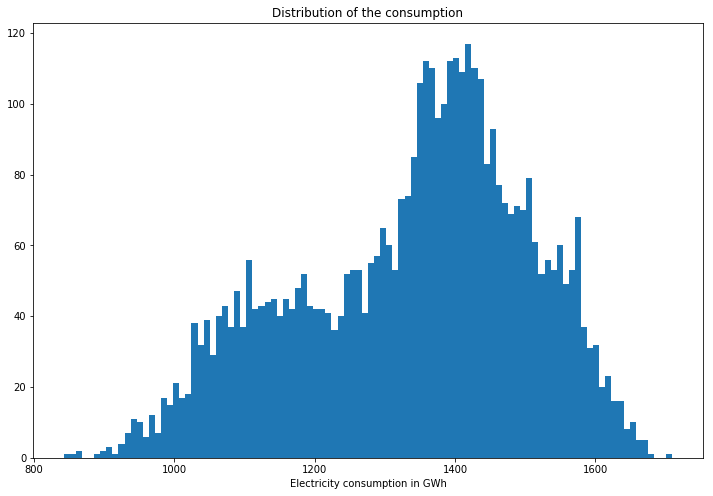

In [19]:
# Distribution of the consumption
plt.figure(figsize=(12,8))
plt.hist(df['Consumption'], bins=100)
plt.title("Distribution of the consumption")
plt.xlabel("Electricity consumption in GWh")
plt.show()

/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


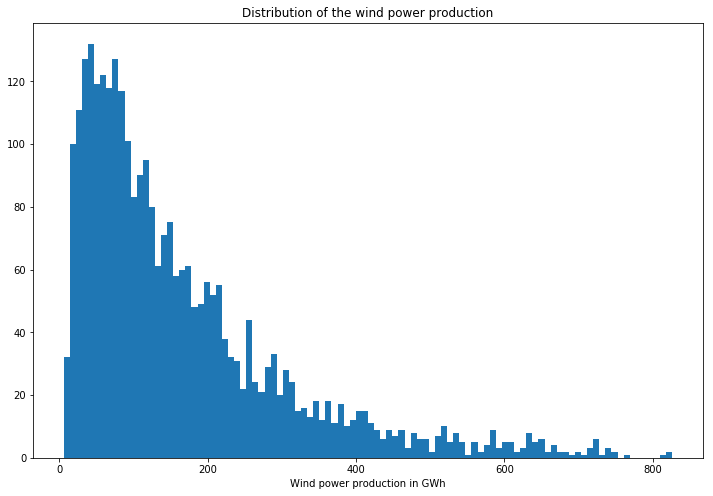

In [20]:
# Distribution of the wind power production
plt.figure(figsize=(12,8))
plt.hist(df['Wind'], bins=100)
plt.title("Distribution of the wind power production")
plt.xlabel("Wind power production in GWh")
plt.show()

/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


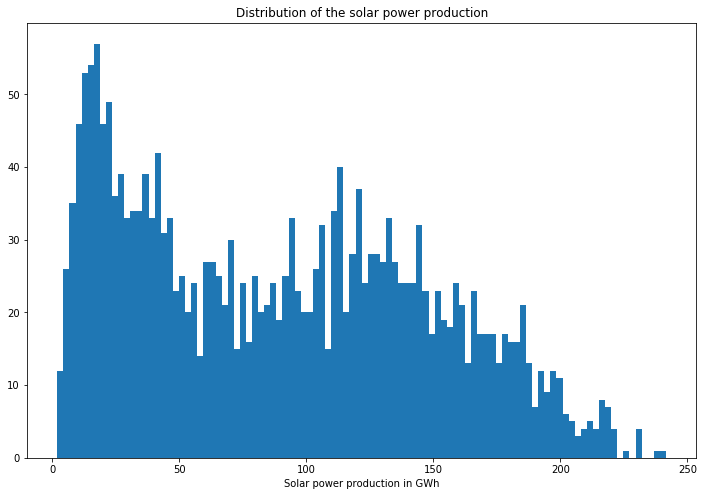

In [21]:
# Distribution of the solar power production
plt.figure(figsize=(12,8))
plt.hist(df['Solar'], bins=100)
plt.title("Distribution of the solar power production")
plt.xlabel("Solar power production in GWh")
plt.show()

### Time series

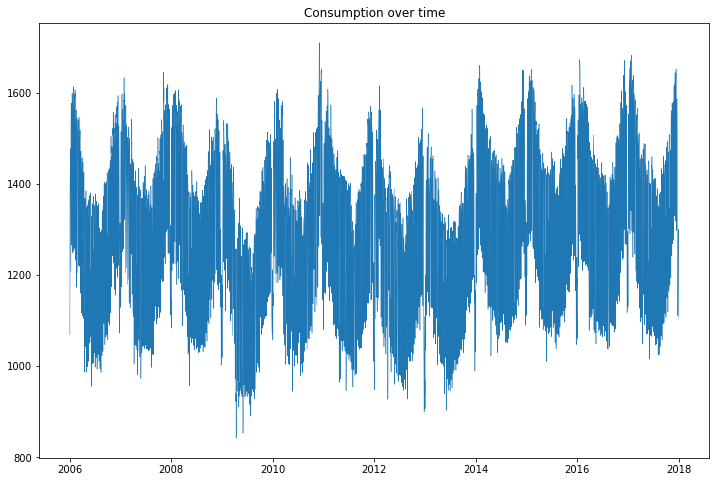

In [22]:
plt.figure(figsize=(12,8))
plt.plot(df['Consumption'], linewidth = 0.5)
plt.title("Consumption over time")
plt.show()

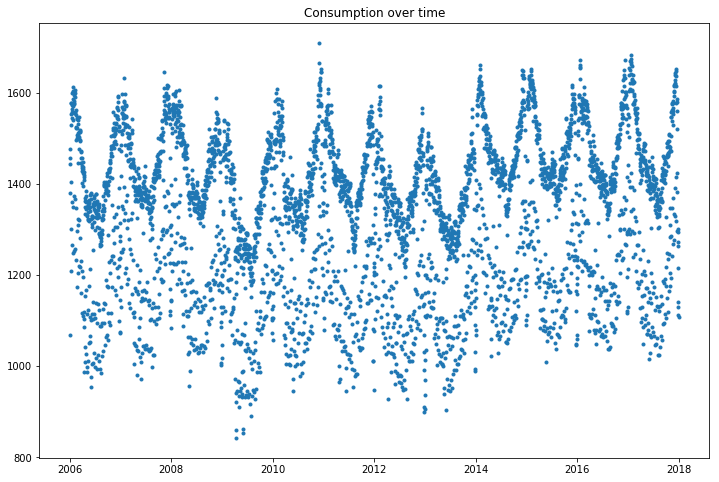

In [23]:
plt.figure(figsize=(12,8))
plt.plot(df['Consumption'], linewidth = 0.5, linestyle = "None", marker='.')
plt.title("Consumption over time")
plt.show()

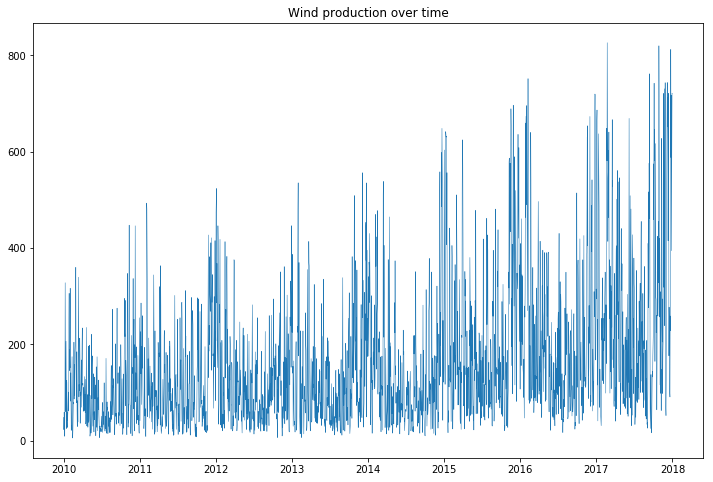

In [24]:
plt.figure(figsize=(12,8))
plt.plot(df['Wind'], linewidth = 0.5)
plt.title("Wind production over time")
plt.show()

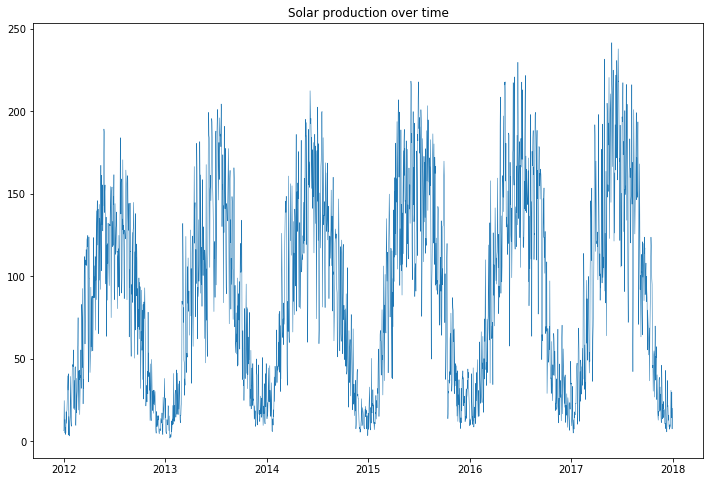

In [25]:
plt.figure(figsize=(12,8))
plt.plot(df['Solar'], linewidth = 0.5)
plt.title("Solar production over time")
plt.show()

We observe large seasonal trends over time. 
- The solar production is much smaller during winter times. 
- The wind production is however larger during winter times, and the consumption as well.
- There is an increasing trend in production of both solar and wind power over time.

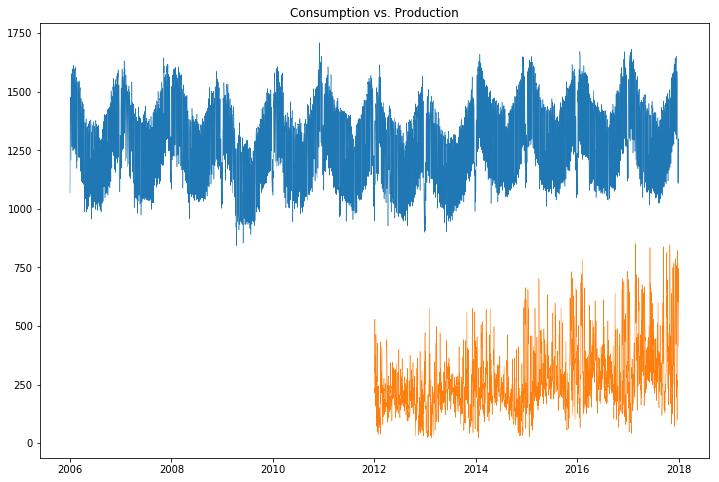

In [55]:
plt.figure(figsize=(12,8))
plt.plot(df['Consumption'], linewidth = 0.5)
plt.plot(df['Wind+Solar'], linewidth = 0.5)
plt.title("Consumption vs. Production")
plt.show()

### Change Scale

#### Yearly

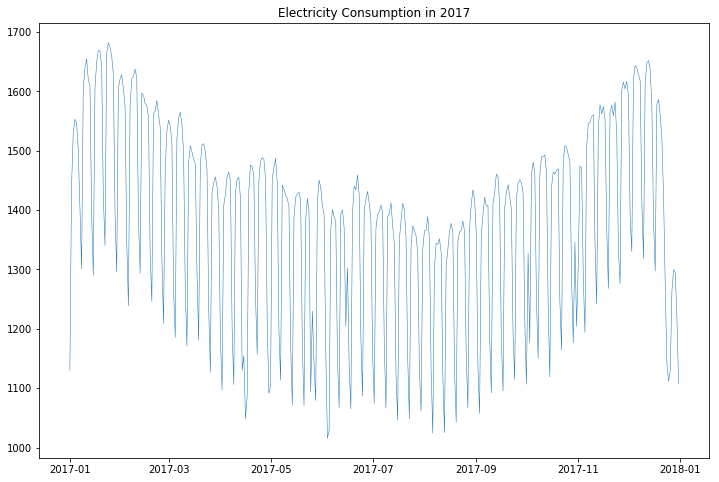

In [26]:
plt.figure(figsize=(12,8))
plt.plot(df.loc['2017-01':'2017-12']['Consumption'], linewidth = 0.5)
plt.title("Electricity Consumption in 2017")
plt.show()

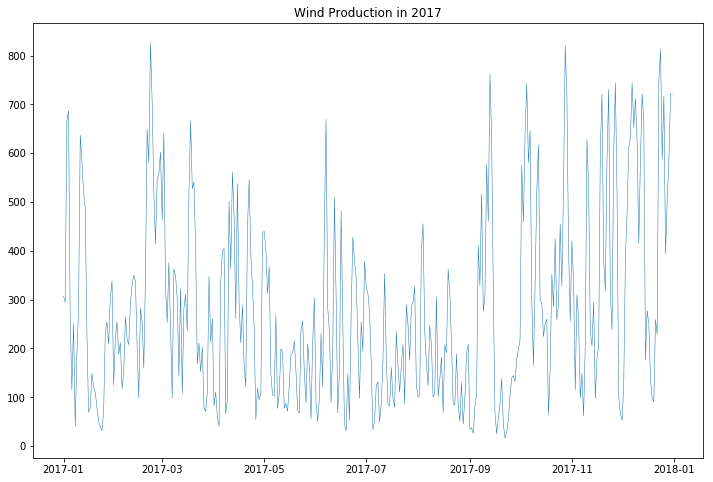

In [27]:
plt.figure(figsize=(12,8))
plt.plot(df.loc['2017-01':'2017-12']['Wind'], linewidth = 0.5)
plt.title("Wind Production in 2017")
plt.show()

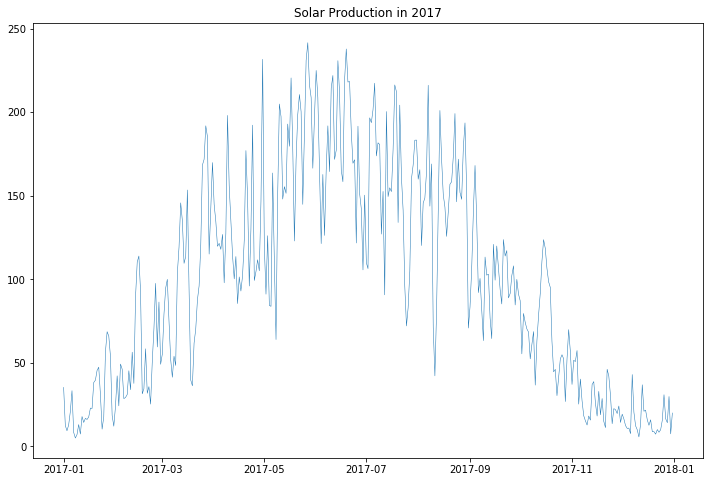

In [28]:
plt.figure(figsize=(12,8))
plt.plot(df.loc['2017-01':'2017-12']['Solar'], linewidth = 0.5)
plt.title("Solar Production in 2017")
plt.show()

#### Weekly

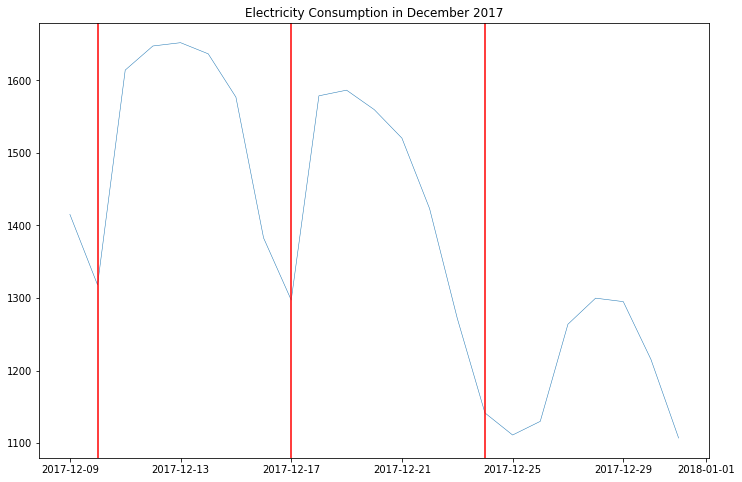

In [29]:
plt.figure(figsize=(12,8))
plt.plot(df.loc['2017-12-09':'2017-12-31']['Consumption'], linewidth = 0.5)
plt.title("Electricity Consumption in December 2017")
plt.axvline("2017-12-10", c='r')
plt.axvline("2017-12-17", c='r')
plt.axvline("2017-12-24", c='r')
plt.show()

### Box Plots

In [31]:
df['year'] = df.index.year
df['month'] = df.index.month
df['day'] = df.index.weekday_name

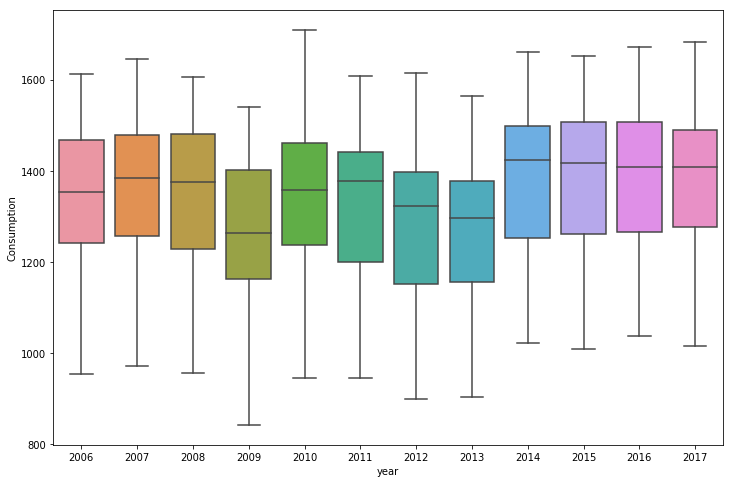

In [51]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df, x='year', y='Consumption')
plt.show()

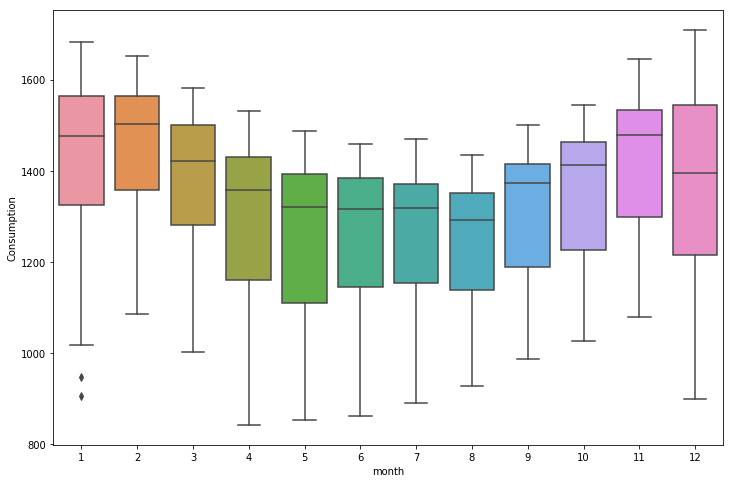

In [52]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df, x='month', y='Consumption')
plt.show()

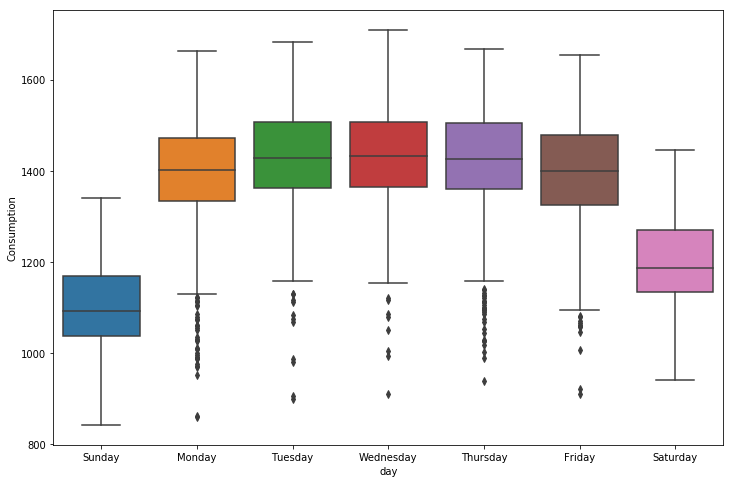

In [53]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df, x='day', y='Consumption')
plt.show()

## Filling Missing Values

In [65]:
df = df.fillna(method='ffill')
df.describe()

,Consumption,Wind,Solar,Wind+Solar,year,month
count,4383.000000,2922.000000,2192.000000,2192.000000,4383.000000,4383.000000
mean,1338.675836,164.884228,89.265476,272.461183,2011.500342,6.522930
std,165.775710,143.724954,58.509625,146.249196,3.452347,3.449097
min,842.395000,5.757000,1.968000,21.478000,2006.000000,1.000000
25%,1217.859000,62.377750,35.199250,172.057250,2008.500000,4.000000
50%,1367.123000,119.098000,86.407000,240.746000,2012.000000,7.000000
75%,1457.761000,218.126750,135.031500,338.791500,2014.500000,10.000000
max,1709.568000,826.278000,241.580000,851.556000,2017.000000,12.000000


# II. Analysis of the time series

## Autocorrelation

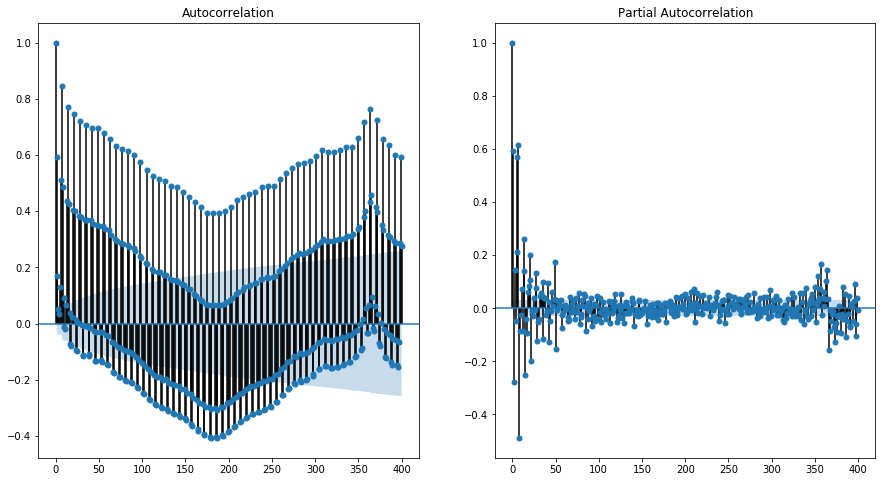

In [66]:
fig, axes = plt.subplots(1, 2, figsize=(15,8))

fig = sm.graphics.tsa.plot_acf(df['Consumption'], lags=400, ax=axes[0])
fig = sm.graphics.tsa.plot_pacf(df['Consumption'], lags=400, ax=axes[1])

## Decomposition

<Figure size 432x288 with 0 Axes>

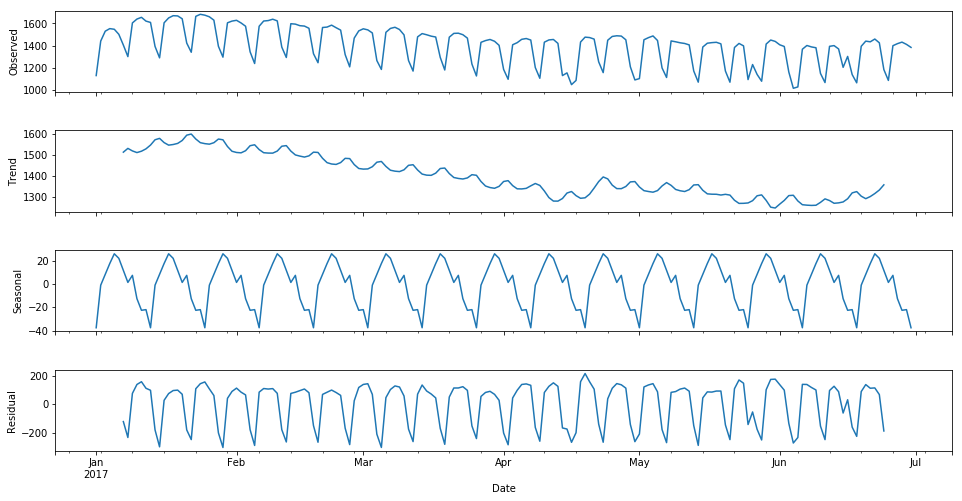

In [70]:
decomposition = seasonal_decompose(df.loc['2017-01':'2017-06', 'Consumption'], freq=12)  
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(15, 8)